## healthcare sector

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import math

C:\Users\jtt\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jtt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\jtt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


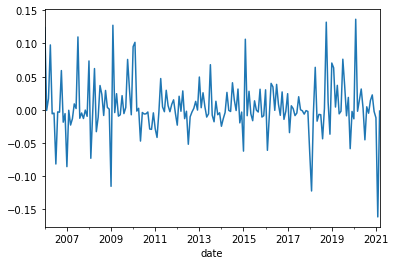

In [2]:
data = pd.read_csv('C:/Users/jtt/Desktop/hc_data.csv')
data.index = pd.to_datetime(data['date'])
data.drop(columns='date', inplace=True)
data['tv'].plot()

In [4]:
data.shape

(183, 20)

## 12 months

In [3]:
d12 = data.drop(['tv','fif','eig'], axis=1)
d12 = d12.dropna()
d12x = d12.drop(columns='tw')
d12y = d12.tw
i = math.floor(d12.shape[0] * 0.7)# train proportion
xtrain12 = d12x.iloc[0:i,]
xtest12 = d12x.iloc[i:,]
ytrain12 = d12y[0:i]
ytest12 = d12y[i:]
rf12 = RandomForestRegressor(random_state=42)
rf12.fit(xtrain12, ytrain12)
ypred12 = rf12.predict(xtest12)
mae12 = mean_absolute_error(ytest12, ypred12)
print(f'RF_MAE_12mths = {mae12:.4f}')

RF_MAE_12mths = 0.5016


In [4]:
scale = StandardScaler()
xtrain12_s = scale.fit_transform(xtrain12)
xtest12_s = scale.fit_transform(xtest12)
rf12_s = RandomForestRegressor(random_state=42)
rf12_s.fit(xtrain12_s, ytrain12)
ypred12_s = rf12_s.predict(xtest12_s)
mae12_s = mean_absolute_error(ytest12, ypred12_s)
print(f'RF_MAE_12mths_Scaling = {mae12_s:.4f}')

RF_MAE_12mths_Scaling = 0.4533


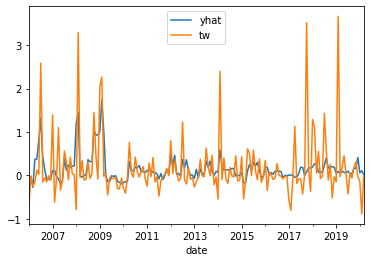

In [5]:
d12x_s = scale.fit_transform(d12x)
yhat12 = rf12_s.predict(d12x_s)
d12['yhat'] = yhat12
d12[['yhat','tw']].plot()

## 15 months 

In [6]:
d15 = data.drop(['tv','tw','eig'], axis=1)
d15 = d15.dropna()
d15x = d15.drop(columns='fif')
d15y = d15.fif
j = math.floor(d15.shape[0] * 0.7)# train proportion
xtrain15 = d15x.iloc[0:j,]
xtest15 = d15x.iloc[j:,]
ytrain15 = d15y[0:j]
ytest15 = d15y[j:]
rf15 = RandomForestRegressor(random_state=42)
rf15.fit(xtrain15, ytrain15)
ypred15 = rf15.predict(xtest15)
mae15 = mean_absolute_error(ytest15, ypred15)
print(f'RF_MAE_15mths = {mae15:.4f}')

RF_MAE_15mths = 0.4744


In [7]:
scale = StandardScaler()
xtrain15_s = scale.fit_transform(xtrain15)
xtest15_s = scale.fit_transform(xtest15)
rf15_s = RandomForestRegressor(random_state=42)
rf15_s.fit(xtrain15_s, ytrain15)
ypred15_s = rf15_s.predict(xtest15_s)
mae15_s = mean_absolute_error(ytest15, ypred15_s)
print(f'RF_MAE_15mths_Scaling = {mae15_s:.4f}')

RF_MAE_15mths_Scaling = 0.5214


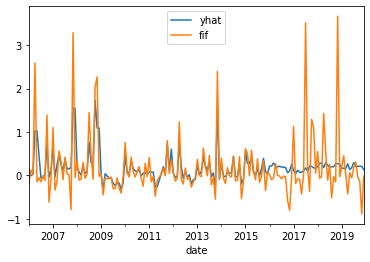

In [8]:
yhat15 = rf15.predict(d15x)
d15['yhat'] = yhat15
d15[['yhat','fif']].plot()

## 18 months

In [5]:
d18 = data.drop(['tv','tw','fif'], axis=1)
d18 = d18.dropna()
d18x = d18.drop(columns='eig')
d18y = d18.eig
k = math.floor(d18.shape[0] * 0.7)# train proportion
xtrain18 = d18x.iloc[0:k,]
xtest18 = d18x.iloc[k:,]
ytrain18 = d18y[0:k]
ytest18 = d18y[k:]
rf18 = RandomForestRegressor(random_state=42)
rf18.fit(xtrain18, ytrain18)
# random forest prediction result
ypred18 = rf18.predict(xtest18)

In [24]:
from sklearn.metrics import mean_absolute_percentage_error

In [27]:
# original - no ensemble
mae18 = mean_absolute_error(ytest18, ypred18)
mape18 = mean_absolute_percentage_error(ytest18, ypred18)
print(f'RF_MAE_noensemble = {mae18:.4f}')
print(f'RF_MAPE_noensemble = {mape18:.4f}')

RF_MAE_noensemble = 0.0324
RF_MAPE_noensemble = 6.4618


In [11]:
# add in sarimax prediction result
sari = data['tv'].head(115)

In [13]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(sari,order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\jtt\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\jtt\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [17]:
saripred = results.forecast(50)

In [28]:
# 5-5 ypred:saripred
y55 = 0.5*ypred18+0.5*saripred
mae55 = mean_absolute_error(ytest18, y55)
mape55 = mean_absolute_percentage_error(ytest18, y55)
print(f'RF_MAE_55 = {mae55:.4f}')
print(f'RF_MAPE_55 = {mape55:.4f}')

RF_MAE_55 = 0.0295
RF_MAPE_55 = 6.4428


In [29]:
# 7-3 ypred:saripred
y73 = 0.7*ypred18+0.3*saripred
mae73 = mean_absolute_error(ytest18, y73)
mape73 = mean_absolute_percentage_error(ytest18, y73)
print(f'RF_MAE_73 = {mae73:.4f}')
print(f'RF_MAPE_73 = {mape73:.4f}')

RF_MAE_73 = 0.0305
RF_MAPE_73 = 3.1348


In [30]:
# 3-7 ypred:saripred
y37 = 0.3*ypred18+0.7*saripred
mae37 = mean_absolute_error(ytest18, y37)
mape37 = mean_absolute_percentage_error(ytest18, y37)
print(f'RF_MAE_37 = {mae37:.4f}')
print(f'RF_MAPE_37 = {mape37:.4f}')

RF_MAE_37 = 0.0291
RF_MAPE_37 = 9.8547


In [40]:
# 8-2 ypred:saripred
y82 = 0.8*ypred18+0.2*saripred
mae82 = mean_absolute_error(ytest18, y82)
mape82 = mean_absolute_percentage_error(ytest18, y82)
print(f'RF_MAE_82 = {mae82:.4f}')
print(f'RF_MAPE_82 = {mape82:.4f}')

RF_MAE_82 = 0.0310
RF_MAPE_82 = 2.4912


In [ ]:
# go with 82
yhat18 = rf18.predict(d18x)
d18['yhat'] = yhat18
d18[['yhat','eig']].plot()

In [10]:
scale = StandardScaler()
xtrain18_s = scale.fit_transform(xtrain18)
xtest18_s = scale.fit_transform(xtest18)
rf18_s = RandomForestRegressor(random_state=42)
rf18_s.fit(xtrain18_s, ytrain18)
ypred18_s = rf18_s.predict(xtest18_s)
mae18_s = mean_absolute_error(ytest18, ypred18_s)
print(f'RF_MAE_18mths_Scaling = {mae18_s:.4f}')

RF_MAE_18mths_Scaling = 0.5411


In [46]:
data['eig'].head(165)

date
2006-01-31    0.109779
2006-02-28   -0.012851
2006-03-31   -0.004879
2006-04-30   -0.013213
2006-05-31   -0.000521
                ...   
2019-05-31    0.022380
2019-06-30   -0.002628
2019-07-31   -0.012146
2019-08-31   -0.161588
2019-09-30   -0.001941
Name: eig, Length: 165, dtype: float64

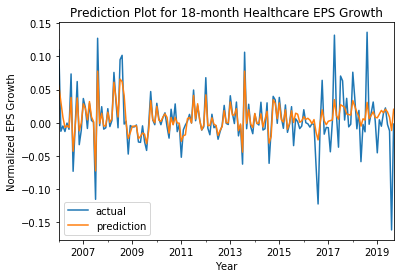

In [48]:
yhat18 = rf18.predict(d18x)
ypred82 = 0.8*yhat18+0.2*data['eig'].head(165)
d18['prediction'] = ypred82
d18 = d18.rename(columns={'eig': 'actual'})
d18[['actual','prediction']].plot(xlabel='Year', ylabel='Normalized EPS Growth', title='Prediction Plot for 18-month Healthcare EPS Growth')

## prediction

In [51]:
d = data.tail(1).drop(['tv','tw','fif','eig'],axis=1)

In [63]:
d

,bus_conf,con_cred,cpi,con_exp,ppi,vix,inv,ppe,fed_cat,recession_prob,hc_RD,health_exp,num_saas,aging_pop_pct,med_policyholder_pct,num_hospitals
date,,,,,,,,,,,,,,,,
2021-03-31,0.007328,0.000527,0.010731,0.016,1.088403,-0.105761,0.022862,-0.015241,1,0.94,225,4100,50,17.0,18.7,5970


In [57]:
# rf result
rf = rf18.predict(d)
rf

array([0.03089381])

In [60]:
data['eig'].head(165)

date
2006-01-31    0.109779
2006-02-28   -0.012851
2006-03-31   -0.004879
2006-04-30   -0.013213
2006-05-31   -0.000521
                ...   
2019-05-31    0.022380
2019-06-30   -0.002628
2019-07-31   -0.012146
2019-08-31   -0.161588
2019-09-30   -0.001941
Name: eig, Length: 165, dtype: float64

In [61]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data['eig'].head(165),order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
saripred = results.forecast(20)

C:\Users\jtt\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\jtt\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [62]:
saripred

2019-10-31    0.030618
2019-11-30   -0.022466
2019-12-31   -0.010630
2020-01-31    0.044419
2020-02-29   -0.004045
2020-03-31   -0.007623
2020-04-30    0.025040
2020-05-31   -0.015967
2020-06-30   -0.011086
2020-07-31   -0.000887
2020-08-31    0.062362
2020-09-30   -0.004011
2020-10-31    0.024815
2020-11-30   -0.004755
2020-12-31   -0.006776
2021-01-31    0.013548
2021-02-28   -0.001646
2021-03-31   -0.007293
2021-04-30    0.020831
2021-05-31   -0.003465
Freq: M, dtype: float64

In [64]:
0.0309*0.8-0.0073*0.2

0.023260000000000003